### An Introduction to the Simplified Molecular Input Line Entry System (SMILES)

Install the necessary Python packages

In [1]:
!pip install rdkit-pypi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.4/29.4 MB 12.7 MB/s eta 0:00:00


Load the necessary Python libraries

In [2]:
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import rdDepictor
from rdkit import Chem

IPythonConsole.ipython_useSVG = True
IPythonConsole.molSize = 300, 300
rdDepictor.SetPreferCoordGen(True)

SMILES provides a simple, compact, somewhat human-readable notation for representing molecules.  SMILES, which is an acronym for **S**implified **M**olecular **I**nput **L**ine **E**ntry **S**ystem, was developed by [David Weininger](https://pubs.acs.org/doi/10.1021/ci00057a005) in the 1980s, a time when software like ChemDraw or Marvin Sketch for drawing chemical structures was unheard of.  While we now have easy access to chemical sketchers and don't typically have to create SMILES by hand, the format is still widely used.  Over time, SMILES has become one of a small number of generally accepted formats for representing chemical structures.  SMILES are also often referred to as "SMILES strings".  While it's fine to refer to a SMILES as a SMILES string, one should **never** refer to a single SMILES as "SMILE". Remember, "S" stands for "system".  Please don't refer to a "SMILE" or a "SMILE string". If you do this, I will roll my eyes.  You have been warned!

The canonical reference for SMILES is the [Daylight Theory Manual](https://www.daylight.com/dayhtml/doc/theory/), I've borrowed liberally from that here. The [Daylight SMILES Tutorial](https://www.daylight.com/dayhtml_tutorials/languages/smiles/index.html) is another essential reference. For a bit more information on the history and folklore around SMILES, please consult this article from [Chemistry World](https://www.chemistryworld.com/opinion/weiningers-smiles/4014639.article).

### Atoms

SMILES are a combination of text symbols that represent atoms, bonds, and ring closures. Common organic elements are represented by their atomic symbols (B,C,N,O,S,F,Cl,Br,I) while less usual atomic symbols with two characters are represented in square brackets ([Au],[Ag],[Se]).

### Bonds

Single bonds between adjacent atoms are implicit.  For instance, "CCC" will represent "n-propane".  Double bonds are indicated by "=" and triple bonds are indicated by "#".  Let's take a look at how we can depict the SMILES for a few molecules.  In order to do this, we'll use the RDKit Python library.  We will start by importing the RDKit Chemistry library.

We can use the RDKit function **Chem.MolFromSmiles** to covert a SMILES to a molecule object that can be depicted. There are two ways that we can display a molecule's structure in the RDKit.  As shown below, we can create a molecule object and assign that object to a variable, here the variable is named "propane".  If we put a variable name on the final line of a cell in a Jupyter notebook, the value of that variable is displayed.  When that variable is a molecule, its structure is shown.

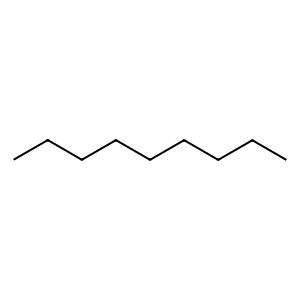

In [6]:
nonane = Chem.MolFromSmiles("CCCCCCCCC")
nonane

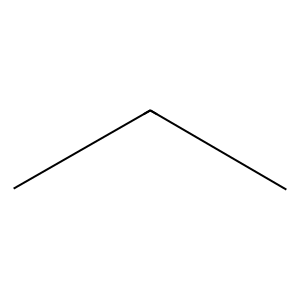

In [3]:
propane = Chem.MolFromSmiles("CCC")
propane

We can also simply display the results of **Chem.MolFromSmiles**.

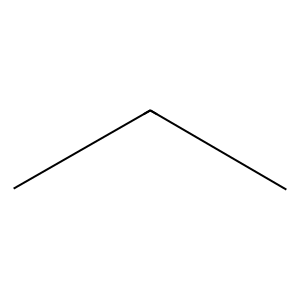

In [7]:
Chem.MolFromSmiles("CCC")

Let's use a double bond to construct the SMILES for 2-pentene.  You may ask why I didn't call the variable in the cell below **2-penente**.  In Python, variable names cannot begin with a number.  In python, the string "2-pentene" would be interpreted as "two minus pentene".

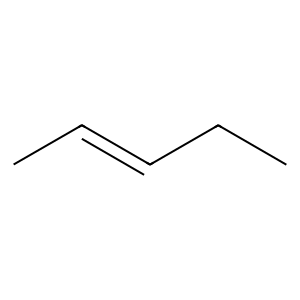

In [8]:
pentene = Chem.MolFromSmiles("CC=CCC")
pentene

In a similar fashion, we can incorporate a triple bond and write the SMILES for 2-pentene.

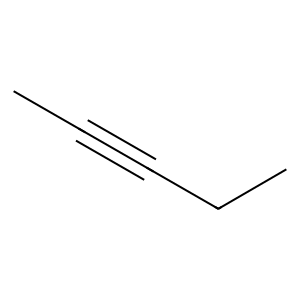

In [9]:
pentyne = Chem.MolFromSmiles("CC#CCC")
pentyne

Of course, we can go beyond simple hydrocarbons, let's look at some more interesting examples.

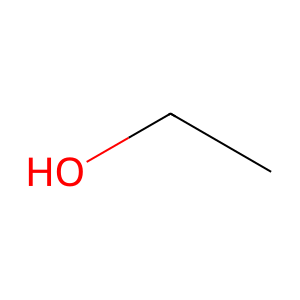

In [10]:
ethanol = Chem.MolFromSmiles("CCO")
ethanol

The ethanol example above brings up another interesting point about SMILES, hydrogens are **usually** implicit.  There are a few exceptions that we'll get to later.  Note that when we wrote the SMILES for ethanol, we didn't have to specify the hydrogen on the oxygen.  Oxygen normally has a valence of two, the oxygen in ethanol only has one attached hydrogen, therefore we assume it has one hydrogen attached.  Similarly, the first carbon in ethanol has one other carbon attached, since carbon typically has a valence of four we assume that it has three hydrogens attached.  Neither the hydrogen on the alcohol oxygen nor the carbons needs to be explicitly specified.

This brings up another point.  Hydrogen atoms can be used in SMILES, but the hydrogens must be contained within square brackets and associated with a heavy atom.  For instance, it is valid to write the SMILES for ethanol as CC[OH], it's equally valid to write ethanol as [CH3][CH2][OH].  As an exercise, depict the two representations above for ethanol. Note that if you specify the wrong number of explicit hydrogens, the molecule will be considered to be a radical.  Try depicting [CH2][CH2][OH].

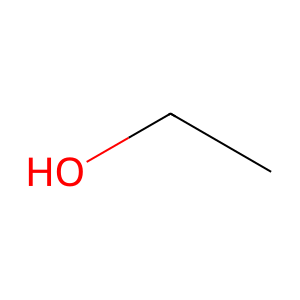

In [11]:
Chem.MolFromSmiles("CC[OH]")

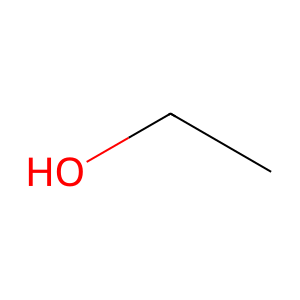

In [13]:
Chem.MolFromSmiles("[CH3][CH2][OH]")

### Charges

Positive and negative charges are included by adding "+" or "-" in square brackets with the atom type. In addition, hydrogens attached to the atom must be explicitly specified.
Here's ethylamine

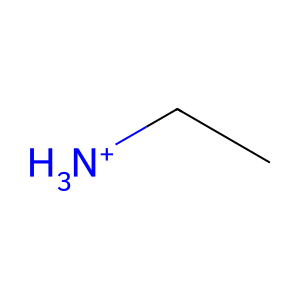

In [14]:
ethylamine = Chem.MolFromSmiles("CC[NH3+]")
ethylamine

Here's acetate, more on parentheses and branching below.

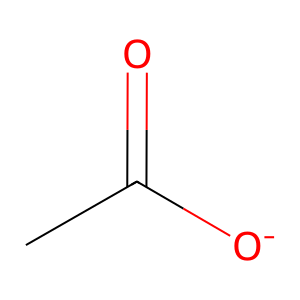

In [15]:
acetate = Chem.MolFromSmiles("CC(=O)[O-]")
acetate

### Disconnected Structures

In some cases, a molecule may contain multiple entities that are not connected by a covalent bond.  In SMILES, the two entities are represented as two SMILES separated by a ".".  For instance, let's look at acetate with a sodium salt.  The positioning of the sodium salt in the depiction isn't ideal but the SMILES is valid.

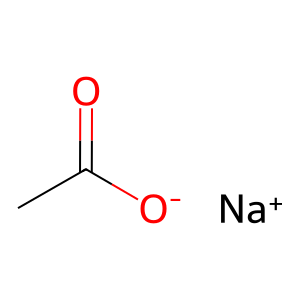

In [16]:
acetate_salt = Chem.MolFromSmiles("CC(=O)[O-].[Na+]")
acetate_salt

### Branching

Branching in SMILES is indicated with parentheses.  For instance, one can depict acetone using the SMILES "CC(=O)C". Note how the parentheses are used to indicate the branching in the carbonyl.

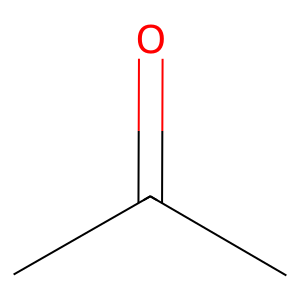

In [17]:
acetone = Chem.MolFromSmiles("CC(=O)C")
acetone

Let's take a look at a few more examples.  In order to look at more than one example, we'll put the SMILES and the names of the associated molecules into a text buffer.

In [18]:
# define a text buffer for our examples
examples = """C(C)(C)O isopropanol
C(Cl)(Cl)(Cl)Cl carbon tetrachloride
CC(=O)O acetic acid"""
# not that we use the second argumen to split to only return two tokens
smiles_list = [x.split(" ",1) for x in examples.split("\n")]

In [19]:
smiles_list

[['C(C)(C)O', 'isopropanol'],
 ['C(Cl)(Cl)(Cl)Cl', 'carbon tetrachloride'],
 ['CC(=O)O', 'acetic acid']]

In order to make our lives a little easier, we're going to define a function that will use the MolsToGridImage function from the  RDKit to display multiple structures.

In [20]:
from rdkit.Chem.Draw import MolsToGridImage

def display_structures(smiles_list):
    mol_list = []
    name_list = []
    for smiles, name in smiles_list:
        mol_list.append(Chem.MolFromSmiles(smiles))
        name_list.append(name)
    return MolsToGridImage(mol_list,legends=name_list,molsPerRow=4)

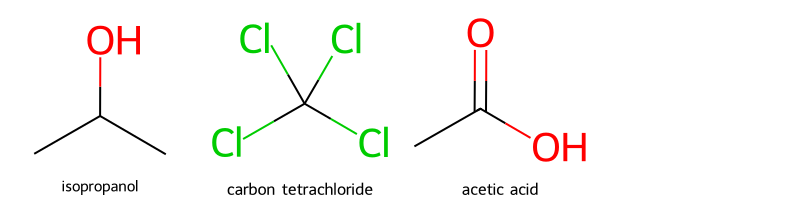

In [21]:
display_structures(smiles_list)

### Exercise

Write the SMILES and display a table of chemical structures for the following. If you don't know the structures, google the names.

1. 2-menthylpentene CC(C)CCC
2. isopropanal
3. 2-pentyn-1-ol
4. 1,2,2,3-tetrafluorobutane
5. propanoic acid
6. 2-t-butyl-3-hydroxy-propane

In [29]:
from re import S
# prompt: convert names to smiles
smiles_list2=[["CC(C)CCC","2-menthylpentene"], ['C(C)(C)O', 'isopropanol'], ['CC(=O)O', '2-pentyn-1-ol']]


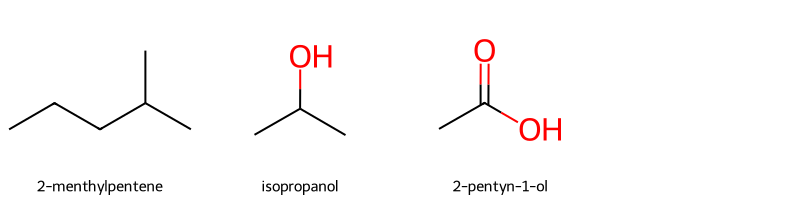

In [30]:
display_structures(smiles_list2)

### Rings
In SMILES, rings are indicated by specifying a "closure digit" indicating atoms that are connected.  For instance, the SMILES for cyclohexane is C1CCCCC1.

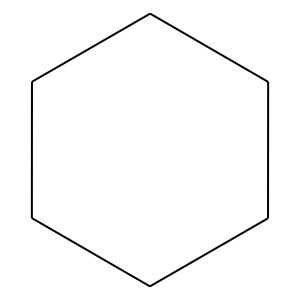

In [ ]:
Chem.MolFromSmiles("C1CCCCC1")

Double bonds and heteroatoms can be put into rings in the same way they were in acyclic structures.

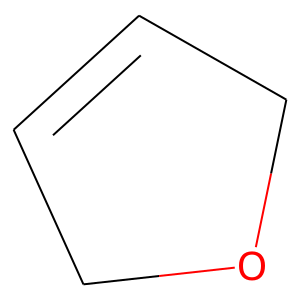

In [ ]:
mol = Chem.MolFromSmiles("C1=CCOC1")
mol

In [33]:
# define a text buffer for our examples
examples = """C1CC1 cyclohexane
C1CCC1 cyclobutane
C1CCC=C1 cyclopentene"""
# note that we use the second argumen to split to only return two tokens
ring_smiles_list = [x.split(" ",1) for x in examples.split("\n")]

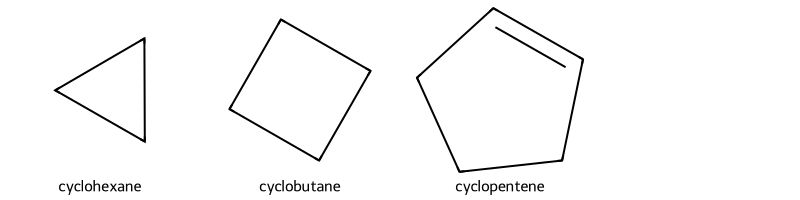

In [34]:
display_structures(ring_smiles_list)

In the case of fused ring systems, a single atom can have multiple ring closure digits.

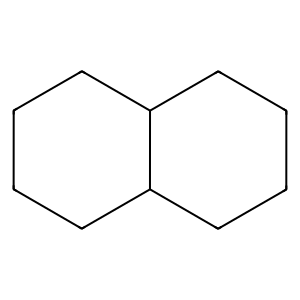

In [35]:
mol = Chem.MolFromSmiles("C12CCCCC1CCCC2")
mol

Also, note that a ring closure digit can be "reused".  In the SMILES below the digit "1" is used to indicate the closure of two different rings.  Note that the SMILES could also be expressed as "C1CCCCC1C2CCCCO2".  Go ahead, try it.

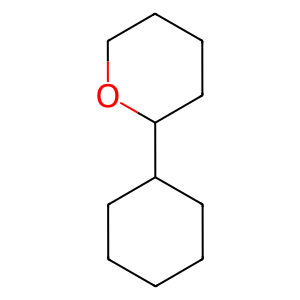

In [36]:
Chem.MolFromSmiles("C1CCCCC1C1CCCCO1")

### Exercise
Write the SMILES and display a table of chemical structures for the following.
1. 1,2-dimethylcyclopropane
2. 1-methyl-3,3-dimethylcyclohexane
3. piperazine
4. hydrindane
5. norbornane
6. cyclopentanol

In [37]:
#Write your code here

### Aromaticity

Aromatic atoms are indicated by lower case characters. According to Daylight C,N,P,O,S,As, and Se can be considered aromatic.  As an example, benzene can be expressed as c1ccccc1 and pyridine as c1ccccn1. Note that in the same way there are implicit single bonds between uppercase characters (e.g. CCC) there are implicit aromatic bonds between lowercase characters.

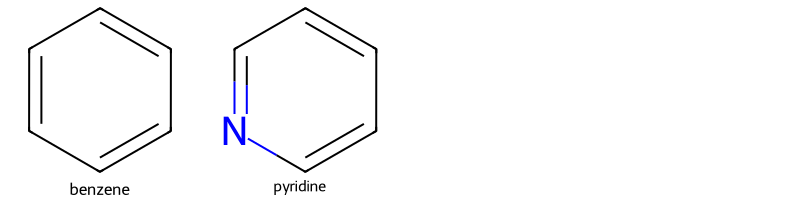

In [38]:
# define a text buffer for our examples
examples = """c1ccccc1 benzene
c1ccccn1 pyridine"""
aromatic_smiles_list = [x.split(" ",1) for x in examples.split("\n")]
display_structures(aromatic_smiles_list)

When an aromatic nitrogen has an attached hydrogen, this hydrogen must be explicitly specified. Note that if we don't specify an explicit hydrogen on the nitrogen in pyrrole, we get an error.

In [39]:
mol = Chem.MolFromSmiles("c1cccn1")

[05:05:10] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4


If we include the attached hydrogen, the valid SMILES is processed.

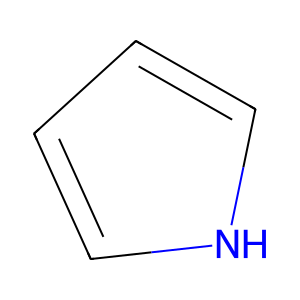

In [42]:
mol = Chem.MolFromSmiles("c1ccc[nH]1")
mol

We also need to include explicit hydrogens when we have an aromatic carbon with a charge.  For instance, we must include an explicit hydrogen on the anionic carbon in cyclopentadienyl anion.

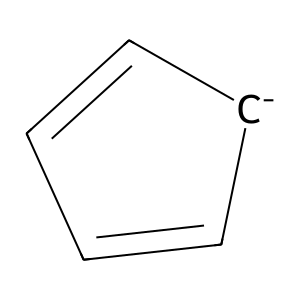

In [43]:
mol = Chem.MolFromSmiles("c1ccc[cH-]1")
mol

### Exercise

Write the SMILES and display a table of chemical structures for the following.

1. furan
2. benzimidazole
3. toluene
4. indole
5. tropyllium cation
6. napthalene

In [44]:
#Write your code here

### Stereochemistry

In SMILES, tetrahedral stereochemistry is indicated by "@" indicating anticlockwise and "@@" indicating clockwise. Quoting from the Daylight SMILES tutorial.
<pre>
Looking FROM the 1st neighbor listed in the SMILES TO the chiral atom, the other three neighbors appear anticlockwise or clockwise in the order listed.
</pre>
Also, note that a chiral atom will be listed in square brackets and any attached hydrogens must be explicitly specified.

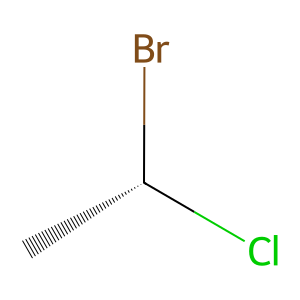

In [46]:
Chem.MolFromSmiles("[C@H](C)(Cl)(Br)")

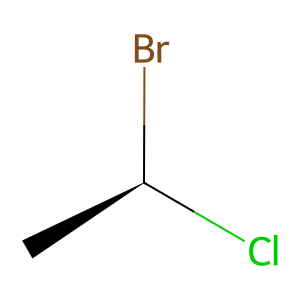

In [47]:
Chem.MolFromSmiles("[C@@H](C)(Cl)(Br)")

E,Z isomerism in double bonds is shown with "/" and "\\".  In the cells below, we can see the visual mnemonic with trans-2-butene as C/C=C/C and cis-2-butene as C/C=C\C.

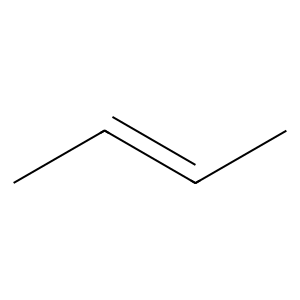

In [50]:
Chem.MolFromSmiles("C/C=C/C")

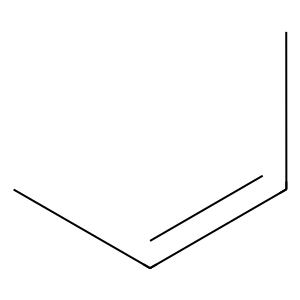

In [51]:
Chem.MolFromSmiles("C/C=C\C")

### Canonical SMILES

There are many ways to write a SMILES for the same molecule.  For instance, in the cell below, we show five different ways to write the SMILES for pentane.

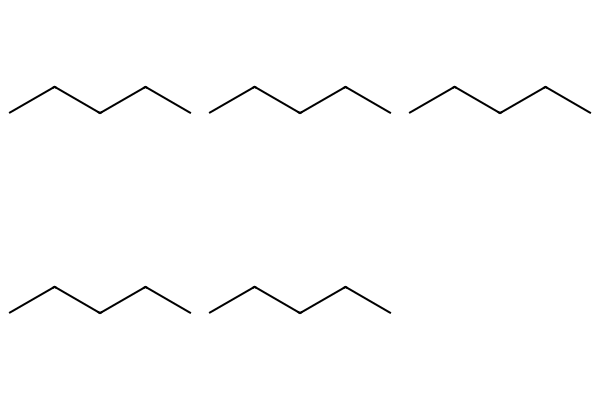

In [52]:
pentane_smiles_list = ["CCCCC","C(CCCC)","C-C-C-C-C","[CH3][CH2][CH2][CH2][CH3]","CC(CCC)"]
# If the line below doesn't make sense to you, take a look at list comprehensions in Python
pentane_mol_list = [Chem.MolFromSmiles(x) for x in pentane_smiles_list]
Chem.Draw.MolsToGridImage(pentane_mol_list)

It's convenient to be able to write many SMILES for the same molecule, but this can also be a problem.  Let's say we're trying to keep track of the number of unique molecules in a set.  If the same molecule can have several SMILES, it can be difficult to keep track of which molecules are the same.  Fortunately, [the RDKit](https://www.rdkit.org/docs/source/rdkit.Chem.rdmolfiles.html) and many other Cheminformatics toolkits have methods for creating what is called a **canonical** representation.  These methods should always create the same SMILES for a molecule.  Here's an example where we create a canonical SMILES for the pentane_smiles_list above. Note that all the input SMILES are different but all the output SMILES are the same.  It's important to know that all Cheminformatics toolkits do not generate the same canonical SMILES.

In [53]:
pentane_smiles_list = ["CCCCC","C(CCCC)","C-C-C-C-C","[CH3][CH2][CH2][CH2][CH3]","CC(CCC)"]
# If the line below doesn't make sense to you, take a look at list comprehensions in Python
pentane_mol_list = [Chem.MolFromSmiles(x) for x in pentane_smiles_list]
for mol in pentane_mol_list:
    pentane_smiles = Chem.MolToSmiles(mol)
    print(pentane_smiles)

CCCCC
CCCCC
CCCCC
CCCCC
CCCCC


Canonical SMILES typically don't resolve tautomers to the same structure.  Specialized methods that are beyond the scope of this discussion are often required to create the same SMILES from Tautomers. In the example below we look at the SMILES for the keto and enol tautomers of pyridone.

In [54]:
tautomer_smiles_list = ["C1C=CC(=O)NC=1","C1=CC=C(O)N=C1"]
tautomer_mol_list = [Chem.MolFromSmiles(x) for x in tautomer_smiles_list]

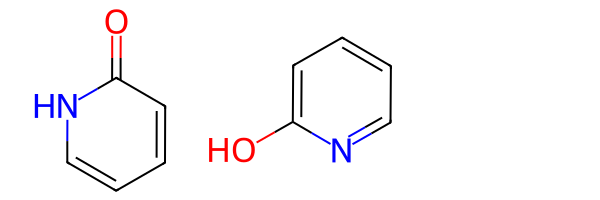

In [55]:
Chem.Draw.MolsToGridImage(tautomer_mol_list)

Now let's generate canonical SMILES for each of these species.  In looking at the SMILES below, please notice two things.
- The SMILES for the ring atoms have been converted to lowercase, indicating that this is an aromatic system.
- The two tautomers still have different SMILES

In [56]:
for mol in tautomer_mol_list:
    print(Chem.MolToSmiles(mol))

O=c1cccc[nH]1
Oc1ccccn1


### Exercise

Complete the code below to determine the number of unqiue molecule represented by **smiles_list**

In [57]:
buff = """C(=N)(N)N.Cl
Cn1c(=O)c2[nH]cnc2n(C)c1=O.Cn1c(=O)c2[nH]cnc2n(C)c1=O.NCCN
Nc1ccc(S(=O)(=O)Nc2ccccn2)cc1
Cl.N=C(N)N
CCC(C)C1(C(=O)NC(=O)[N-]C1=O)CC.[Na+]
C[C@]12CCC(=O)C=C1CC[C@@H]3[C@@H]2CC[C@]4([C@H]3CC[C@]4(C)O)C
CCC(C)C1(CC)C(=O)[N-]C(=O)NC1=O.[Na+]
Cn1c2c(c(=O)n(c1=O)C)[nH]cn2.Cn1c2c(c(=O)n(c1=O)C)[nH]cn2.C(CN)N
C[C@]1(O)CC[C@H]2[C@@H]3CCC4=CC(=O)CC[C@]4(C)[C@H]3CC[C@@]21C
c1ccnc(c1)NS(=O)(=O)c2ccc(cc2)N"""
smiles_list = buff.split("\n")

In [61]:
for mon in buff:
  print(Chem.MolToSmiles(mol))

Oc1ccccn1
Oc1ccccn1
Oc1ccccn1
Oc1ccccn1
Oc1ccccn1
Oc1ccccn1
Oc1ccccn1
Oc1ccccn1
Oc1ccccn1
Oc1ccccn1
Oc1ccccn1
Oc1ccccn1
Oc1ccccn1
Oc1ccccn1
Oc1ccccn1
Oc1ccccn1
Oc1ccccn1
Oc1ccccn1
Oc1ccccn1
Oc1ccccn1
Oc1ccccn1
Oc1ccccn1
Oc1ccccn1
Oc1ccccn1
Oc1ccccn1
Oc1ccccn1
Oc1ccccn1
Oc1ccccn1
Oc1ccccn1
Oc1ccccn1
Oc1ccccn1
Oc1ccccn1
Oc1ccccn1
Oc1ccccn1
Oc1ccccn1
Oc1ccccn1
Oc1ccccn1
Oc1ccccn1
Oc1ccccn1
Oc1ccccn1
Oc1ccccn1
Oc1ccccn1
Oc1ccccn1
Oc1ccccn1
Oc1ccccn1
Oc1ccccn1
Oc1ccccn1
Oc1ccccn1
Oc1ccccn1
Oc1ccccn1
Oc1ccccn1
Oc1ccccn1
Oc1ccccn1
Oc1ccccn1
Oc1ccccn1
Oc1ccccn1
Oc1ccccn1
Oc1ccccn1
Oc1ccccn1
Oc1ccccn1
Oc1ccccn1
Oc1ccccn1
Oc1ccccn1
Oc1ccccn1
Oc1ccccn1
Oc1ccccn1
Oc1ccccn1
Oc1ccccn1
Oc1ccccn1
Oc1ccccn1
Oc1ccccn1
Oc1ccccn1
Oc1ccccn1
Oc1ccccn1
Oc1ccccn1
Oc1ccccn1
Oc1ccccn1
Oc1ccccn1
Oc1ccccn1
Oc1ccccn1
Oc1ccccn1
Oc1ccccn1
Oc1ccccn1
Oc1ccccn1
Oc1ccccn1
Oc1ccccn1
Oc1ccccn1
Oc1ccccn1
Oc1ccccn1
Oc1ccccn1
Oc1ccccn1
Oc1ccccn1
Oc1ccccn1
Oc1ccccn1
Oc1ccccn1
Oc1ccccn1
Oc1ccccn1
Oc1ccccn1
Oc1ccccn1
Oc1ccccn1
